insert a legal move using chess notation: 
insert a legal move: e4
Analyze position? (Y/N): N
Continue? (Y/N): Y
insert a legal move: e5
Analyze position? (Y/N): N
Continue? (Y/N): Y
insert a legal move: Qh5
Analyze position? (Y/N): Y

WhiteELO    1720
BlackELO    1729
dtype: int32
WhiteELO    2342
BlackELO    2479
dtype: int32
-1.764042608747505
1.8377639971213373
Epoch 1/10
1/1 [==============================] - 0s 441ms/step - loss: 168.9771 - accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 2ms/step - loss: 168.9056 - accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 2ms/step - loss: 168.8520 - accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 2ms/step - loss: 168.8061 - accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 2ms/step - loss: 168.7644 - accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 2ms/step - loss: 168.7254 - accuracy: 0.0000e+00
Epoch 7/10
1/1 [==

ValueError: Empty data passed with indices specified.

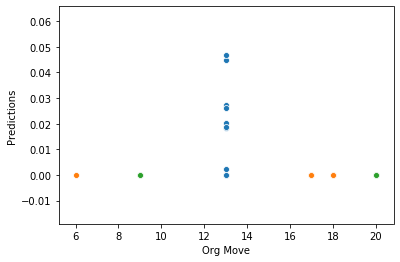

In [1]:
#!/usr/bin/env python
#!/usr/bin/env python
# coding: utf-8

# In[6]:


#!/usr/bin/env python
# coding: utf-8

# In[1]:


#!/usr/bin/env python
# coding: utf-8
#King = K, Queen = Q, Bishop = B, Knight = N, Rook = R, Pawn = no notation.
#Capturing an enemy piece sees an “x” placed between the piece moved and the square the captured piece was upon.
#When the opponent’s king is threatened by check, a “+” sign is added to the end of the notation.
#Checkmate is denoted with either “++” or “#”
#From left-to-right the squares are ordered alphabetically with letters from “a” through to “h”.
#Additionally, Each square also gets a unique number, from “1” to “8”. 
#Castling kingside (with the rook that begins on the “h” file), is written as “0-0”. 
#Castling queenside (with the rook that begins on the “a” file) is notated with “0-0-0”.
#If a pawn makes it all the way to the end of the board to promote to a new piece, add a “=” symbol

# In[1]:

#Import meant for all libraries
import chess
import math
import re
import csv
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.svm import SVC


# In[3]:


#Base chess board
#rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR
#Chess board after e4 Nf6 Nf3 Nxe4
#rnbqkb1r/pppppppp/8/8/4n3/5N2/PPPP1PPP/RNBQKB1R
#Chess board after e4 Nf6 Nf3 Ng4
#nbqkb1r/pppppppp/8/8/4P1n1/5N2/PPPP1PPP/RNBQKB1R
#Chess board after e4 e5 Nf3 Nc6
#r1bqkbnr/pppp1ppp/2n5/4p3/4P3/5N2/PPPP1PPP/RNBQKB1R



def gmBoard(board):

    # In[4]:

    #Opening chess database
    database = open("dataFinal.csv",'r')


    # In[5]:

    #Reading database and getting important info from the user's inputted board
    boardmoves = board.ply()
    boardtest = board.board_fen()
    text = database.read()
    
    # In[6]:
    a = text.split()

    # In[7]:
    #Setting up the for loop
    TotalGames = []
    TotalGameAnswers = []
    LegalMoves = []
    LegalMoveOrder = []
    move = 0
    winner = 0
    #Taking all of the legal moves and putting them in an array so that they can be converted to integer format later
    for i in board.legal_moves:
        LegalMoves.append(board.san(i))
    for i in range(0, len(LegalMoves)):
        LegalMoveOrder.append(i)

    k = 1
    play = False
    End = False
    moves = -1
    board2 = chess.Board()

    for i in (range(3,len(a))):
        if play:
            moves -= 1
            try:
                board2.push_san(a[i])
            except:
                #meaningless instruction necessary for except block to work
                j = 'j'

        if "White" in a[i] or "Black" in a[i] or "Draw" in a[i]:
            #When reading the beginning of a game, 
            if "White" in a[i]:
                winner = 1
            elif "Black" in a[i]:
                winner = -1
            else:
                winner = 0

            b = a[i].split(",")
            play = True
            moves = boardmoves + (boardmoves // 2)

        if moves == 0:
            play = False

            if ((board2.board_fen() == boardtest) and "1." not in a[i+k]):
                TotalGames.append([int(b[0]),int(b[1])])
                for j in LegalMoves:
                    if j == a[i+k]:

                        move = LegalMoves.index(j)
                TotalGameAnswers.append([winner,move])
            moves = -1
            End = False
            board2 = chess.Board()



    df = pd.DataFrame(np.array(TotalGames),
                       columns = ['WhiteELO', 'BlackELO'])
    dfAnswers = pd.DataFrame(np.array(TotalGameAnswers),
                            columns = ['Winner', 'NextMove'])
    '''
    print(df)
    print(dfAnswers)
    print(df.dtypes)
    print(dfAnswers.dtypes)
    '''

# In[ ]:


    scaler = StandardScaler()
    X_train, X_test, y_train, y_test = train_test_split(df, dfAnswers, test_size=0.5, random_state=101)


    print()
    print(X_train.min())
    print(X_train.max())
    scaler.fit(X_train)
    ScaledData=scaler.transform(X_train)
    print(ScaledData.min())
    print(ScaledData.max())


    # In[2]:


    X_train=scaler.transform(X_train)
    X_test=scaler.transform(X_test)


    # In[3]:


   



    # In[4]:


    model = Sequential()
    model.add(Dense(4,activation='relu'))
    model.add(Dense(4,activation='relu'))
    model.add(Dense(4,activation='relu'))
    model.add(Dense(1,activation='relu'))
    model.compile(optimizer='rmsprop',loss='mse',metrics = ["accuracy"])


    # In[5]:


    #print(scaler.transform(y_train))
    model.fit(x=X_train,y=y_train['NextMove'],epochs=10)


    # In[6]:


    loss_df=pd.DataFrame(model.history.history)
    #loss_df.plot()


    # In[7]:

    print(model.evaluate(X_test, y_test['NextMove'], verbose = 0))


    # In[8]:

    print(model.evaluate(X_train, y_train['NextMove'], verbose = 0))


    # In[9]:


    test_predictions = model.predict(X_test)
    '''
    print(X_test)
    print(test_predictions)
    print(len(test_predictions))
    '''

    # In[10]:


    test_predictions = pd.DataFrame(test_predictions)
    print(test_predictions)
    pred_df = pd.DataFrame(np.array(y_test['NextMove']))
    pred_df = pd.concat([pred_df,test_predictions],axis=1)
    pred_df.columns = ['Org Move','Predictions']


    # In[11]:

    print(pred_df)


    # In[12]:
    # = pd.DataFrame(np.array(y_test['NextMove']))

    #Really odd plot, something went wrong
    sns.scatterplot(x='Org Move', y='Predictions', data=pred_df)


    # In[13]:

    print(LegalMoves)
    print(LegalMoveOrder)
    print('Calculating win rate . . .')   
    
    clf = SVC()
    clf.fit(X_train, y_train['Winner'])
    r = clf.score(X_test, y_test['Winner'])
    SVC()
    qt = clf.predict([[1,-1]])
    print("Chance of winning: ")
    print(r)
    print(qt)
    
    '''
    SVM_Model = SVC(gamma='auto')
    SVM_Model.fit(X_train,y_train)
    clf = SVC(X_train, y_train['Winner'], epochs=100, lr=1e-3, C=30)
    clf.fit()

    p = np.sign(clf.predict(X_train))
    p = p - y_train.flatten()

    # Prediction accuracy should be 1.0 for the training set
    print("Accuracy |", len(np.where(p == 0)[0]) / len(p))
    '''
# In[2]:






#Asking user to input chess board
board = chess.Board()
print("insert a legal move using chess notation: ")
while True:
    x=input("insert a legal move: ")
    try:
        board.push_san(x)
    except:
        print("That is not a legal move.")
    z=input("Analyze position? (Y/N): ")
    if z == "Y" or z == "y":
        gmBoard(board)
    y=input("Continue? (Y/N): ")
    if y == "N" or y == "n":
        break



# In[ ]:





# In[ ]:




# In[ ]:





# In[ ]:


#e4 e5 Bc4 
